<a href="https://colab.research.google.com/github/hannahf97/HowCom/blob/main/word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 49.7MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
import nltk

In [ ]:
f = open("/content/drive/MyDrive/2021 창업동아리/컴활.txt",'r',encoding='utf-8')
data = f.read()
f.close()

In [ ]:
train_data = pd.read_table("/content/drive/MyDrive/2021 창업동아리/컴활.txt")

In [ ]:
print(len(train_data))

79


In [ ]:
with open('/content/drive/MyDrive/2021 창업동아리/컴활.txt', 'r') as f:
    stopwords = f.readlines()
train_data = [line.rstrip('\n') for line in stopwords] 

In [ ]:
with open('/content/drive/MyDrive/2021 창업동아리/stopwords.txt', 'r') as f:
    stopwords = f.readlines()
stopwords = [line.rstrip('\n') for line in stopwords] 

In [ ]:
stopwords

In [ ]:
okt = Okt()
tokenized_data = []
for sentence in train_data:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

최대 길이 : 65
평균 길이 : 23.3


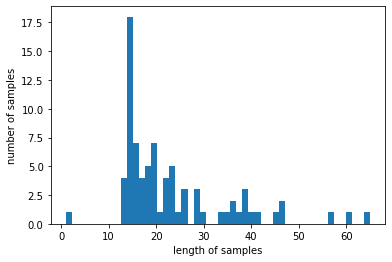

In [ ]:
# 리뷰 길이 분포 확인
print('최대 길이 :',max(len(l) for l in tokenized_data))
print('평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model.wv.vectors.shape

(64, 100)

In [ ]:
print(model.wv.most_similar("폼"))

[('하다', 0.3976586163043976), ('다음', 0.3579140305519104), ('를', 0.3539304733276367), ('설명', 0.3472387194633484), ("'", 0.3466869592666626), ('에', 0.3431684076786041), ('필드', 0.338030070066452), ('데이터베이스', 0.333074688911438), ('경우', 0.33162713050842285), ('데이터시트', 0.32511982321739197)]


In [ ]:
print(model.wv.most_similar("데이터시트"))

[('의', 0.37301748991012573), ('하다', 0.35753723978996277), ('을', 0.3515262007713318), ('않다', 0.3443695306777954), ('경우', 0.3324844241142273), ('폼', 0.3251197934150696), ('입력', 0.3215245008468628), ("'", 0.32124650478363037), ('다음', 0.30824312567710876), ('으로', 0.3071138858795166)]
